<a href="https://colab.research.google.com/github/Yta-ux/estudo-estatistica/blob/main/Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística e Probabilidade

É a ciência que coleta, organiza, analisa e interpreta dados para tomada de decisão.
- Dados são informações que vêm de observações, contagens, medições ou respostas

## População e Amostra

**População** são todos os dados do nosso conjunto de estudo, ou seja, dados de todo o universo a ser estudado naquele momento.
**Amostra** é um subconjunto dessa população, uma parcela que represente ela para que sejam realizadas inferências.

> Dados coletados de forma correta, irão fornecer inferências corretas.



## Estatística Descritiva e Inferencial

**Estatística Descritiva:** Ramo da estatística que trabalha com o conjunto universo, organizando, resumindo e representando os dados.

**Estatística Inferencial:**Ramo que envolve o trabalho com amostras para chegar a conclusões sobre uma população - probabilidade

# Estatística Descritiva

Fornece métodos para organização e descrição do conjunto de dados. Sendo aplicado em uma coleta de população.

Tem como objetivo tornar os dados mais fáceis de serem entendidos.

## Distribuição de Frequência

- Sua ideia principal é agrupar intervalos chamados de classes, e atribui-los a uma frequência.

- Fornece uma organização para dados brutos.

- Dispõe os dados com base nas ocorrências de cada uma das classes.

- As classes possuem seu limite inferior e superior, a distância entre esses limites (intervalo fechado) é chamada de **largura**.

In [21]:
import pandas as pd

# Definição do número de classes e seleção da base de dados
n_classes = 5
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')
alugueis = data.cnt


# Encontrar a amplitude dos dados

maior = max(alugueis)
menor = min(alugueis)
amplitude = maior - menor

# Encontrar a amplitude das classes

amplitude_classe = round(amplitude/n_classes) # Mesma coisa que a largura da classe

# Limites de classes
limites_inf = [menor]

for x in range(n_classes):
  limites_inf.append(limites_inf[x]+amplitude_classe)

limites_inf

# Contar ocorrências nas classes
frequencias = {'classe1':0, 'classe2':0, 'classe3':0, 'classe4':0, 'classe5':0}

for numero in alugueis:
  if numero < limites_inf[1]:
    frequencias['classe1'] +=1
  elif numero < limites_inf[2]:
    frequencias['classe2'] +=1
  elif numero < limites_inf[3]:
    frequencias['classe3'] +=1
  elif numero < limites_inf[5]:
    frequencias['classe4'] +=1
  else:
    frequencias['classe5'] +=1

# frequencias

431
993
1555
2117
2679


### Frequência Relativa

- É baseada no percentual de frequência que determinada classe possui.
- Alteraçãoo nos dados da escala.
- Para conseguir essa medida, basta pegar as frequências coletadas e dividir pelas ocorrências (quantidade máxima do array)

In [24]:
n_ocorrencias = len(alugueis)

for classe in frequencias:
  frequencias[classe] = (frequencias[classe] / n_ocorrencias) * 100
frequencias

{'classe1': 0.0,
 'classe2': 0.0,
 'classe3': 0.0,
 'classe4': 0.0,
 'classe5': 0.0}

### Histograma de Frequência

- Gráfico que facilita a visualização dos dados.
- Um historigrama de frequência é um diagrama com barras que representam a distribuição de frequência de um conjunto de dados.
- Propriedades:
  - A escala horizontal representa os valores das faixas de cada classe.
  - A escala vertical mede a frequência de cada classe.
  - As barras consecutivas devem estar encostadas umas nas outras.



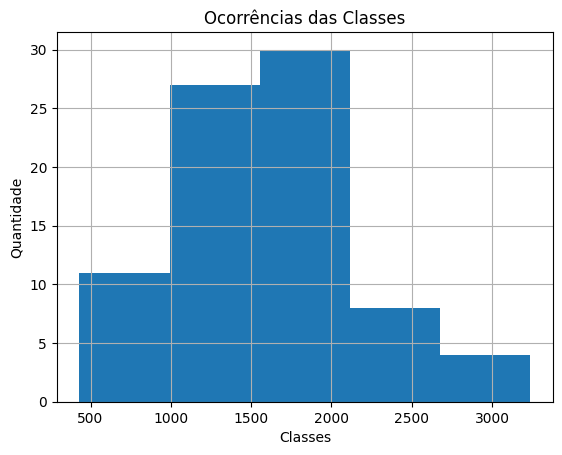

In [3]:
import matplotlib.pyplot as plt

plt.hist(alugueis, 5)
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

## Medidas de Tendência Central
- São medidas que buscam descrever um conjunto de dados a partir de um valor central.
- As distribuições de frequências e os gráficos de frequência são poderosas ferramentas.

### Média

- Medida mais conhecida e aplicada no meio estatístico.
- Méda é soma de todos os valores dividido pela quantidade total desses valores.

$$
\overline{x} = \frac{\sum_{i=1}^n x_i}{n}
$$

- $\overline{x}$ : Representa a média simples.
- $x_i$ : É o valor de cada elemento (ou dado) que será considerado.
- $n$ : É o número total de elementos considerados na média.
- $\sum$ : Representa o somatório.
- $\sum_{i=1}^n x_i$ : É o somatório de todos os valores dos elementos.



In [4]:
import numpy as np

# Usando python nativo
media_alugueis = sum(alugueis)/len(alugueis)

# Usando a lib numpy

np.mean(alugueis)

1621.0875

### Mediana

- Será o valor que está exatamente no meio de um conjunto de dados ordenado.
- Divide o conjunto de dados em duas partes.
- Se o conjunto for ímpar, a mediana é a entrada de dados do meio.
- Se for par, a entrada será uma média das duas entradas do meio.

In [5]:
# Ordena o conjunto de dados
alugueis = sorted(alugueis)

# Calcula o valor da mediana com base na quantidade de elementos do conjunto

if len(alugueis) % 2 == 0:
  indice = (len(alugueis) - 1) // 2
  mediana = (alugueis[indice] + alugueis[ indice + 1]) / 2
else:
  mediana = alugueis[len(alugueis) / 2]


# Calculando a mediana com numpy
np.median(alugueis)

1594.5

### Moda

- É o conjunto de dados com base na ocorrência de determinado valor.
- Se nenhuma ocorrência se repetir, a moda não vai existir


In [6]:
# Criando array
contagens = [0]*len(alugueis)

# Contando ocorrências
for i in range(len(alugueis)):
  contagens[i] = alugueis.count(alugueis[i])

contagens
max(contagens)


indices_moda = np.where(np.array(contagens) == max(contagens))
for indice in indices_moda[0]:
  print(alugueis[indice])

2077
2077


### Qual medida de tendência central eu devo utilizar?

- Média e Mediana são as mais comuns e utilizadas.
- Média é influenciadas por valores discrepantes (outliers).
- Mediana não é afetada por esses valores.

### Média Ponderada

- Média utilizada quando temos um cojunto de valores possui um grau de importância.
- Adicionar pesos nos valores que são necessários.
- É o valor * o peso, tudo isso dividido pela soma dos pesos.

$$
\overline{x} = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}
$$

**Onde:**

- $\overline{x}$ : Representa a média ponderada.
- $x_i$ : É o valor de cada elemento (ou dado) que será considerado.
- $w_i$ : É o peso atribuído ao elemento $x_i$, indicando sua relevância ou importância.
- $n$ : É o número total de elementos considerados na média.
- $\sum$ : Representa o somatório.
- $\sum_{i=1}^n w_i x_i$ : É o somatório do produto entre cada valor $x_i$ e seu respectivo peso $w_i$.
- $\sum_{i=1}^n w_i$ : É o somatório dos pesos atribuídos aos elementos.

## Medidas de Variação

- São utilizadas para avaliarmos a variação presente nos valores de determinado conjunto de dados.
- Unidos com as medidas de tendência central, conseguem fornecer diversas informações acerca da base de dados.
- As medidas de tedência central sozinhas, não conseguem informar muito sobre o conjunto de dados.

$x_1 = \{48, 53, 50, 47, 52\}$

$x_2 = \{20, 30, 50, 60, 80\}$

- As medidas de tendência central não conseguem informar muito sobre como esses dados variam e seus padrões.

### Amplitude

- Medida de variação mais simples.
- Amplitude é definida pela subtração do maior valor, pelo menor valor.
- Sua falha está nos casos em que o menor valor ou maior podem ser outliers.
- Ela ajuda de forma simples a validar o quanto os dados variam, se o valor for pequeno, quer dizer que os dados não estão tão dispersos, se forem maiores, ficam mais dispersos.
- Realizando comparação com a base original de dados.

$$
   \text{Amplitude} = \text{Valor máximo} - \text{Valor mínimo}
$$


$$
   \text{Proporção da Amplitude} = \frac{\text{Amplitude}}{\text{Média}}
$$

In [7]:
amplitude = max(alugueis) - min(alugueis)
amplitude

2808

### Variância

- É definida pela média das diferenças quadradas entre cada dado dividido pela média do conjunto.
- Ele vai medir cada dado do conjunto em relação a média (tendência central).
- Ele vai trabalhar com o dados ao quadrado, para aproximar valores distantes a média e poder eliminar a possibilidade de valores negativos existirem.
- Com base na variância, conseguimos validar se nosso conjunto de dados está muito disperso ou não, comparando o valor com nosso conjunto.

$$\sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n}$$

**Onde:**

#### Explicação dos Termos

$\sigma^2$ (Variância): Representa a **variância da população**. Mede a dispersão dos dados em relação à média $\mu$. Um valor maior de $\sigma^2$ indica maior dispersão dos dados.

$\sum_{i=1}^n$ (Somatório): Representa a soma de todos os valores calculados para cada elemento $x_i$ do conjunto de dados. O somatório garante que estamos considerando todos os elementos da população.

$(x_i - \mu)$ (Desvio): É a **diferença** entre cada valor $x_i$ e a **média da população** $\mu$. Isso mostra o quanto cada dado está distante da média da população.

$(x_i - \mu)^2$ (Desvio ao quadrado): Elevamos o desvio ao quadrado para **remover os sinais negativos** e dar **maior peso aos desvios maiores**. Isso amplifica a contribuição dos valores mais distantes da média.

$n$ (Número de elementos): Representa o número total de elementos na população. Divide o somatório para calcular a **média dos desvios quadrados**.

$\mu$ (Média da população): A **média** de todos os valores na população. Serve como o ponto de referência central para calcular os desvios.

In [27]:
# Forma Manual
var = 0
media = np.mean(alugueis)

for numero in alugueis:
  var += (numero - media) ** 2

var = var / len(alugueis)

## Usando Pandas

var = alugueis.var()
var

319637.3213607595

### Desvio Padrão

- Essa medida vai entrar em conjunto com a variância, pois ela vai trabalhar com uma variância seguindo a mesma unidade que os dados originais.
- A variância apresenta um valor discrepante ao conjunto original dos dados, com o desvio padrào fica mais fácil de correlacionar.

$$\sigma = \sqrt{\sigma^2}$$

$\sigma$ (Desvio padrão): Mede a dispersão dos dados em torno da média. Quanto menor o desvio padrão, mais próximos os dados estão da média.

$\sigma^2$ (Variância): Representa a **variância da população**. Mede a dispersão dos dados em relação à média $\mu$. Um valor maior de $\sigma^2$ indica maior dispersão dos dados.

$\sqrt{}$: Raiz quadrada da variância. Retorna à unidade original dos dados, tornando a interpretação mais fácil.

In [29]:
# Forma Manual
desv = var **(1/2)
desv

# Utilizando pandas

desv = alugueis.std()
desv

565.364768411297

### Interpretando Desvio Padrão e Variância

- Quanto maior eles forem em relação a média (tendência central).
- Utilizar em conjunto com a tendência central para realizar comparações.
- A média quem vai cravar o gráfico num local específico e o desvio padrão e seus valores vão realizando a dispersão, ficando menos ou mais dispersos.

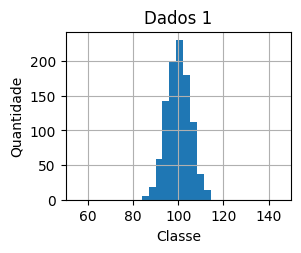

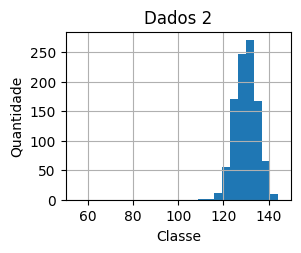

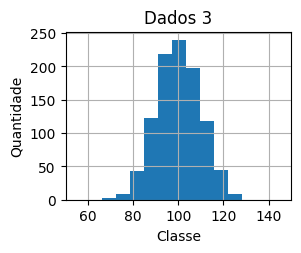

In [30]:
media = 100
desvio = 5
dados1 = np.random.normal(media, desvio, 1000)

media = 130
desvio = 5
dados2 = np.random.normal(media, desvio, 1000)

media = 100
desvio = 10
dados3 = np.random.normal(media, desvio, 1000)

# Plotagem dos gráficos
plt.figure()
plt.subplot(221)
plt.hist(dados1, 10)
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Dados 1')
plt.xlim(50, 150)
plt.grid(True)

plt.figure()
plt.subplot(222)
plt.hist(dados2, 10)
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Dados 2')
plt.xlim(50, 150)
plt.grid(True)

plt.figure()
plt.subplot(223)
plt.hist(dados3, 10)
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Dados 3')
plt.xlim(50, 150)
plt.grid(True)

## Medidas de Posição

- Além de termos as medidas que nos informam a centralidade e a variação dos dados, temos as medidas de posição.
- Essas medidas vão ajudar a definir a posição em que determinado se encontra dentro do conjunto em que ele está inserido.

### Fractis
- São valores que dividem um conjunto de dados em partes iguais, como a mediana faz com um conjunto de dados.

- A medida de posição mais usual é calculada com base nos quartis $Q_1$, $Q_2$, $Q_3$.
  - Aproximadamente 1/4 (25%) dos dados abaixo do primeiro quartil.
  - Aproximadamente metade dos dados abaixo do segundo quartil.
  - Aproximadamente 3/4(75%) dos dados abaixo do terceiro quartil.

**Cálculo dos Quartis**
- Calcular a mediana do conjunto.
- Dividir os dados com a mediana.
- Encontrar a mediana da primeira parte - 25%
- Encontrar a mediada da segunda parte - 75%

**Exemplo: notas de 15 pessoas em uma prova**

- 13 9 18 15 14 21 7 10 11 20 5 18 37 16 17
- Ordena dados:
  - 5 7 9 10 11 13 14 15 16 17 18 18 20 21 37
- Encontra $Q_2$ (mediana):
  - 5 7 9 10 11 **13** **14** 15 16 17 18 18 20 21 37
- Encontra $Q_1$:
  - 5 7 9 10 **11** 13 14 15 16 17 18 18 20 21 37
- Encontra $Q_3$:
  - 5 7 9 10 11 13 14 15 16 16 **17** 18 18 20 21 37

**Interpretação**

- Aproximadamente 1/4 dos funcionários obtém 10 ou menos.
- Aproximadamente metade obtém 15 ou menos.
- Aproximadamente 3/4 obtiveram 18 ou menos.
- Aproximadamente 25% conseguirem mais de 18 pontos.
- Os dados nos permitem várias interpretações, com base em suas posições e usamos uma medida de tenência central para isso, ou seja, as técnicas se complementam.
- Um gráfico que podemos usar para avaliar esses dados é o **boxplot**.


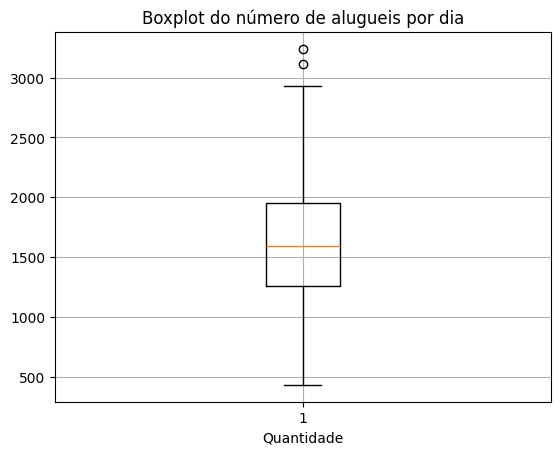

In [31]:
plt.boxplot(alugueis)
plt.title('Boxplot do número de alugueis por dia')
plt.xlabel("Quantidade")
plt.grid()
plt.show()

O gŕafico acima apresenta a seguinte análise:
- O limite mínimo e máximo dos valores está entre **500** e **2.800**.
- A largura da caixa em relação aos limites está pequena, ou seja, estão moderadamente mais concentrados em relação a mediana.
- A mediana, localizada perto de 1500-1600.
- Os quartis estão distribuídos de forma simétrica pela mediana, assim podemos deduzir que eles estão concentrados de forma simétrica.
- Temos a presença de outliers, que fogem dos valores mínimos e máximos, são aqueles valores que fogem da relação que os outros possuem.

**Avisos**
- Vale ressaltar que esse box, é composto por 50% dos valores: 25% - 50% - 75% => 50%
- Ele serve para vermos de maneira mais visual a disposição desses dados, não usamos ele para inferir com exatidão os valores, podemos validar suas tendências.